In [1]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


cid = "e95094f95f8b4a5089263af1484fec78"
secret = "471a83d85bf843c99f368383a7a5c0e4"
username = "128495218"
redirect_uri = "https://example.com/callback/"

os.environ["SPOTIPY_CLIENT_ID"] = cid
os.environ["SPOTIPY_CLIENT_SECRET"] = secret
os.environ["SPOTIPY_REDIRECT_URI"] = redirect_uri

In [2]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = 'user-library-read playlist-read-private'
token = util.prompt_for_user_token(username, scope, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

print(sp)




            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=e95094f95f8b4a5089263af1484fec78&response_type=code&redirect_uri=https%3A%2F%2Fexample.com%2Fcallback%2F&scope=playlist-read-private+user-library-read in your browser


Enter the URL you were redirected to: 




SpotifyOauthError: Bad Request

In [3]:
# Rock Playlist
rock_playlist = sp.user_playlist("YOUR_EMAIL", "1Hs5CeJmwzcYnhOtVEs6bV")
tracks = rock_playlist["tracks"]
songs = tracks["items"]
while tracks['next']:
    tracks = sp.next(tracks)
    for item in tracks["items"]:
        songs.append(item)
rock_ids = [] 
for i in range(len(songs)):
    rock_ids.append(songs[i]['track']['id'])
print(rock_ids)

['7MRyJPksH3G2cXHN8UKYzP', '3dmqIB2Qxe2XZobw9gXxJ6', '17S4XrLvF5jlGvGCJHgF51', '5x53pbGk6sbl1BGom19QQ5', '4mcZYzoGwPRDdhWVlygiHf', '4Ors2f6eZaZBOHwwTEfaXA', '1bCEcOLyDsh3fiHfXdFQ22', '4uluH27y1SDzUh3H9Nd8IQ', '7e89621JPkKaeDSTQ3avtg', '5EWPGh7jbTNO2wakv8LjUI', '0x2wtJbtJrox3SDmnMj97x', '1mqydO6xMtyTPa8yo1SdVr', '4BP3uh0hFLFRb5cjsgLqDh', '5DnT9a5IM3eMjKgXTWVJvi', '2gE95JskwQ1pCACTpGe1Db', '36gPq8WG7tDxrblyGVUCiT', '40riOy7x9W7GXjyGp4pjAv', '4yugZvBYaoREkJKtbG08Qr', '6gXrEUzibufX9xYPk3HD5p', '608xszaAxVh4m7NcKJiAbF', '7D6RG4ZxxrELfhAn0Uecx2', '3lGiHc4wh8ErmyczuggB0D', '0KMGxYKeUzK9wc5DZCt3HT', '0GONea6G2XdnHWjNZd6zt3', '7Ewz6bJ97vUqk5HdkvguFQ', '2RWFncSWZEhSRRifqiDNVV', '0vFOzaXqZHahrZp6enQwQb', '4gMgiXfqyzZLMhsksGmbQV', '6mFkJmJqdDVQ1REhVfGgd1', '31AOj9sFz2gM0O3hMARRBx', '29SyMC0plk6qw8NMF7lfRL', '0UAJH0k4k3slcE83a9UGCe', '78JmElAFmrPNhLjovDR9Jm', '7tFiyTwD0nx5a1eklYtX2J', '7hQJA50XrCWABAu5v6QZ4i', '3cMunJsyeFbyYm7X3LgW9T', '6AAa4zIwllv49ACRh2ndLh', '5CQ30WqJwcep0pYcV4AMNc', '7iN1s7xHE4

In [4]:

rock_features = sp.audio_features(rock_ids)

pprint(rock_features)


[{'acousticness': 0.448,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7MRyJPksH3G2cXHN8UKYzP',
  'danceability': 0.55,
  'duration_ms': 214733,
  'energy': 0.824,
  'id': '7MRyJPksH3G2cXHN8UKYzP',
  'instrumentalness': 0.000127,
  'key': 2,
  'liveness': 0.366,
  'loudness': -5.988,
  'mode': 1,
  'speechiness': 0.0334,
  'tempo': 114.512,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/7MRyJPksH3G2cXHN8UKYzP',
  'type': 'audio_features',
  'uri': 'spotify:track:7MRyJPksH3G2cXHN8UKYzP',
  'valence': 0.777},
 {'acousticness': 0.0272,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3dmqIB2Qxe2XZobw9gXxJ6',
  'danceability': 0.464,
  'duration_ms': 273600,
  'energy': 0.655,
  'id': '3dmqIB2Qxe2XZobw9gXxJ6',
  'instrumentalness': 1.34e-06,
  'key': 7,
  'liveness': 0.328,
  'loudness': -9.058,
  'mode': 0,
  'speechiness': 0.0608,
  'tempo': 169.515,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/3dmqIB2Qxe2

In [5]:
# Rock DataFrame
rock_df = pd.DataFrame(rock_features)
rock_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.448000,https://api.spotify.com/v1/audio-analysis/7MRy...,0.550,214733,0.824,7MRyJPksH3G2cXHN8UKYzP,0.000127,2,0.3660,-5.988,1,0.0334,114.512,4,https://api.spotify.com/v1/tracks/7MRyJPksH3G2...,audio_features,spotify:track:7MRyJPksH3G2cXHN8UKYzP,0.777
1,0.027200,https://api.spotify.com/v1/audio-analysis/3dmq...,0.464,273600,0.655,3dmqIB2Qxe2XZobw9gXxJ6,0.000001,7,0.3280,-9.058,0,0.0608,169.515,4,https://api.spotify.com/v1/tracks/3dmqIB2Qxe2X...,audio_features,spotify:track:3dmqIB2Qxe2XZobw9gXxJ6,0.531
2,0.206000,https://api.spotify.com/v1/audio-analysis/17S4...,0.651,242107,0.766,17S4XrLvF5jlGvGCJHgF51,0.001030,0,0.3620,-9.935,1,0.0299,116.740,4,https://api.spotify.com/v1/tracks/17S4XrLvF5jl...,audio_features,spotify:track:17S4XrLvF5jlGvGCJHgF51,0.949
3,0.398000,https://api.spotify.com/v1/audio-analysis/5x53...,0.625,163893,0.350,5x53pbGk6sbl1BGom19QQ5,0.000068,9,0.1230,-8.395,0,0.0436,113.688,4,https://api.spotify.com/v1/tracks/5x53pbGk6sbl...,audio_features,spotify:track:5x53pbGk6sbl1BGom19QQ5,0.690
4,0.027300,https://api.spotify.com/v1/audio-analysis/4mcZ...,0.579,201693,0.705,4mcZYzoGwPRDdhWVlygiHf,0.000000,6,0.0704,-4.911,0,0.0339,116.172,4,https://api.spotify.com/v1/tracks/4mcZYzoGwPRD...,audio_features,spotify:track:4mcZYzoGwPRDdhWVlygiHf,0.761
5,0.045800,https://api.spotify.com/v1/audio-analysis/4Ors...,0.765,176067,0.721,4Ors2f6eZaZBOHwwTEfaXA,0.000007,7,0.1230,-6.291,1,0.0297,113.906,4,https://api.spotify.com/v1/tracks/4Ors2f6eZaZB...,audio_features,spotify:track:4Ors2f6eZaZBOHwwTEfaXA,0.962
6,0.222000,https://api.spotify.com/v1/audio-analysis/1bCE...,0.756,160693,0.800,1bCEcOLyDsh3fiHfXdFQ22,0.000078,0,0.1430,-4.618,1,0.0278,116.809,4,https://api.spotify.com/v1/tracks/1bCEcOLyDsh3...,audio_features,spotify:track:1bCEcOLyDsh3fiHfXdFQ22,0.961
7,0.354000,https://api.spotify.com/v1/audio-analysis/4ulu...,0.460,181520,0.843,4uluH27y1SDzUh3H9Nd8IQ,0.279000,9,0.2330,-5.649,1,0.0372,127.770,4,https://api.spotify.com/v1/tracks/4uluH27y1SDz...,audio_features,spotify:track:4uluH27y1SDzUh3H9Nd8IQ,0.378
8,0.181000,https://api.spotify.com/v1/audio-analysis/7e89...,0.596,283800,0.605,7e89621JPkKaeDSTQ3avtg,0.000331,7,0.0863,-12.145,1,0.0255,97.798,4,https://api.spotify.com/v1/tracks/7e89621JPkKa...,audio_features,spotify:track:7e89621JPkKaeDSTQ3avtg,0.886
9,0.076500,https://api.spotify.com/v1/audio-analysis/5EWP...,0.252,547107,0.844,5EWPGh7jbTNO2wakv8LjUI,0.000180,0,0.0840,-8.121,1,0.0572,118.158,4,https://api.spotify.com/v1/tracks/5EWPGh7jbTNO...,audio_features,spotify:track:5EWPGh7jbTNO2wakv8LjUI,0.351


In [6]:
rock_columns = ['acousticness', 'analysis_url', 'duration_ms', 'instrumentalness', 'key', 'mode', 'loudness', 
                'speechiness', 'time_signature', 'type', 'uri', 'track_href', 'tempo']
rock_df.drop(rock_columns, inplace=True, axis=1)
rock_df.insert(0,"Genre","Rock")
rock_df.head(10)

,Genre,danceability,energy,id,liveness,valence
0,Rock,0.550,0.824,7MRyJPksH3G2cXHN8UKYzP,0.3660,0.777
1,Rock,0.464,0.655,3dmqIB2Qxe2XZobw9gXxJ6,0.3280,0.531
2,Rock,0.651,0.766,17S4XrLvF5jlGvGCJHgF51,0.3620,0.949
3,Rock,0.625,0.350,5x53pbGk6sbl1BGom19QQ5,0.1230,0.690
4,Rock,0.579,0.705,4mcZYzoGwPRDdhWVlygiHf,0.0704,0.761
5,Rock,0.765,0.721,4Ors2f6eZaZBOHwwTEfaXA,0.1230,0.962
6,Rock,0.756,0.800,1bCEcOLyDsh3fiHfXdFQ22,0.1430,0.961
7,Rock,0.460,0.843,4uluH27y1SDzUh3H9Nd8IQ,0.2330,0.378
8,Rock,0.596,0.605,7e89621JPkKaeDSTQ3avtg,0.0863,0.886
9,Rock,0.252,0.844,5EWPGh7jbTNO2wakv8LjUI,0.0840,0.351


In [7]:
# Country Playlist
country_playlist = sp.user_playlist("YOUR_EMAIL", "73BKRFL2DVwdZjV1n1nAgj")
country_tracks = country_playlist["tracks"]
country_songs = country_tracks["items"]
while country_tracks['next']:
    country_tracks = sp.next(country_tracks)
    for item in country_tracks["items"]:
        country_songs.append(item)
country_ids = [] 
for i in range(len(country_songs)):
    country_ids.append(country_songs[i]['track']['id'])
print(country_ids)

['03fT3OHB9KyMtGMt2zwqCT', '3bDXhWsPiFTHtrsMg5faL2', '0yD66650JxhqKbW76C2qCo', '79LAFAkR1ATb4iIQvZuCL0', '6iy4PoAuZBMvtrlDX4VxC7', '7puxIVNdj5nsBJk43zM3bH', '1TanmIWbaUj5NVwJ3k4XPd', '2uooz6pTIJOEEX7YRjBkhW', '0QBLffvH2bZpMRSY8pwYSM', '59kHPbwyyCApYA8RQQEuXm', '5oHHMDcVOmPSFrCgdbHPdb', '1nCSr7oGeUv7sUEoYuAJFF', '4dl0wqtGJGmi8hlAzWVs4V', '4e4fqjx0Izh4svvTef1z7e', '2aAyDqzwEeVIigSMFM1tNS', '3fqwjXwUGN6vbzIwvyFMhx', '68JS5SFTnW5Yv9Vzw81Jf0', '6foY66mWZN0pSRjZ408c00', '21LRaD9rB3v7p7DDCZsW4y', '3EWMoDIm6lzuR0zQKtuCJX', '0ZUo4YjG4saFnEJhdWp9Bt', '67citk3uzWs5qbaIVKTeg8', '0K3nD5RScU9RemI1OseLiQ', '022TgXGyKTNkYKzY998KvX', '6QmqOxJhxmybGD8p0AIaRB', '1Ot4ZdisApG5BTK7bsvZsb', '1gKSpFpX3poa17WIAyFVsp', '2xYQTU2bbg6WVAmpY1eae4', '1OmKo4t4Bh95xQI6WGiUR3', '2uRVPeQbsEpRQD0DKr1WTo', '0qos3ZEeCUXvEQ79LbzL2C', '6iblnklMzUKIXAtjk5lzIy', '3dAgQFdruU8ufWc5GE05xC', '3nKLfeoq3YedJIZqvRW3Qz', '4Y8EyXnq5CLR8A7EHXxx7L', '6wycnu8FWXsj68ig7BEot9', '0b9djfiuDIMw1zKH6gV74g', '1QJvq84l7YcVCyIkGA602c', '1s3ADRSddQ

In [8]:
# Country Feature List
country_features = sp.audio_features(country_ids)

pprint(country_features)


[{'acousticness': 0.0832,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/03fT3OHB9KyMtGMt2zwqCT',
  'danceability': 0.51,
  'duration_ms': 226867,
  'energy': 0.898,
  'id': '03fT3OHB9KyMtGMt2zwqCT',
  'instrumentalness': 0,
  'key': 11,
  'liveness': 0.071,
  'loudness': -3.15,
  'mode': 1,
  'speechiness': 0.0696,
  'tempo': 144.056,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/03fT3OHB9KyMtGMt2zwqCT',
  'type': 'audio_features',
  'uri': 'spotify:track:03fT3OHB9KyMtGMt2zwqCT',
  'valence': 0.596},
 {'acousticness': 0.0104,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3bDXhWsPiFTHtrsMg5faL2',
  'danceability': 0.513,
  'duration_ms': 235266,
  'energy': 0.949,
  'id': '3bDXhWsPiFTHtrsMg5faL2',
  'instrumentalness': 0,
  'key': 0,
  'liveness': 0.154,
  'loudness': -1.723,
  'mode': 1,
  'speechiness': 0.0461,
  'tempo': 159.985,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/3bDXhWsPiFTHtrsMg5faL2',

  'tempo': 118.008,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/11WwkS35rzl8sNuH7tDjxR',
  'type': 'audio_features',
  'uri': 'spotify:track:11WwkS35rzl8sNuH7tDjxR',
  'valence': 0.483},
 {'acousticness': 0.641,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/421ebjYqaIXEG2KloTbXlH',
  'danceability': 0.466,
  'duration_ms': 232160,
  'energy': 0.504,
  'id': '421ebjYqaIXEG2KloTbXlH',
  'instrumentalness': 0,
  'key': 1,
  'liveness': 0.226,
  'loudness': -7.456,
  'mode': 1,
  'speechiness': 0.0396,
  'tempo': 151.719,
  'time_signature': 3,
  'track_href': 'https://api.spotify.com/v1/tracks/421ebjYqaIXEG2KloTbXlH',
  'type': 'audio_features',
  'uri': 'spotify:track:421ebjYqaIXEG2KloTbXlH',
  'valence': 0.222},
 {'acousticness': 0.143,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1ipcb9qXpSHWhSUvdxJhsx',
  'danceability': 0.677,
  'duration_ms': 212640,
  'energy': 0.724,
  'id': '1ipcb9qXpSHWhSUvdxJhsx',
  'instrumentalness'

In [9]:
# Country DataFrame
country_df = pd.DataFrame(country_features)
country_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.08320,https://api.spotify.com/v1/audio-analysis/03fT...,0.510,226867,0.898,03fT3OHB9KyMtGMt2zwqCT,0.000000,11,0.0710,-3.150,1,0.0696,144.056,4,https://api.spotify.com/v1/tracks/03fT3OHB9KyM...,audio_features,spotify:track:03fT3OHB9KyMtGMt2zwqCT,0.596
1,0.01040,https://api.spotify.com/v1/audio-analysis/3bDX...,0.513,235266,0.949,3bDXhWsPiFTHtrsMg5faL2,0.000000,0,0.1540,-1.723,1,0.0461,159.985,4,https://api.spotify.com/v1/tracks/3bDXhWsPiFTH...,audio_features,spotify:track:3bDXhWsPiFTHtrsMg5faL2,0.797
2,0.02930,https://api.spotify.com/v1/audio-analysis/0yD6...,0.645,225560,0.904,0yD66650JxhqKbW76C2qCo,0.000000,2,0.0834,-4.532,1,0.0462,105.970,4,https://api.spotify.com/v1/tracks/0yD66650Jxhq...,audio_features,spotify:track:0yD66650JxhqKbW76C2qCo,0.671
3,0.17400,https://api.spotify.com/v1/audio-analysis/79LA...,0.582,221801,0.728,79LAFAkR1ATb4iIQvZuCL0,0.000000,8,0.1390,-6.151,1,0.0292,150.013,4,https://api.spotify.com/v1/tracks/79LAFAkR1ATb...,audio_features,spotify:track:79LAFAkR1ATb4iIQvZuCL0,0.537
4,0.07170,https://api.spotify.com/v1/audio-analysis/6iy4...,0.710,200667,0.538,6iy4PoAuZBMvtrlDX4VxC7,0.000004,5,0.0367,-12.576,1,0.0344,111.503,4,https://api.spotify.com/v1/tracks/6iy4PoAuZBMv...,audio_features,spotify:track:6iy4PoAuZBMvtrlDX4VxC7,0.698
5,0.23500,https://api.spotify.com/v1/audio-analysis/7pux...,0.630,232427,0.473,7puxIVNdj5nsBJk43zM3bH,0.000000,10,0.0589,-10.526,1,0.0269,138.218,4,https://api.spotify.com/v1/tracks/7puxIVNdj5ns...,audio_features,spotify:track:7puxIVNdj5nsBJk43zM3bH,0.357
6,0.11000,https://api.spotify.com/v1/audio-analysis/1Tan...,0.719,219600,0.687,1TanmIWbaUj5NVwJ3k4XPd,0.000021,3,0.2860,-7.494,1,0.0280,123.878,4,https://api.spotify.com/v1/tracks/1TanmIWbaUj5...,audio_features,spotify:track:1TanmIWbaUj5NVwJ3k4XPd,0.681
7,0.20400,https://api.spotify.com/v1/audio-analysis/2uoo...,0.646,172187,0.854,2uooz6pTIJOEEX7YRjBkhW,0.000031,4,0.3020,-4.386,1,0.0327,124.019,4,https://api.spotify.com/v1/tracks/2uooz6pTIJOE...,audio_features,spotify:track:2uooz6pTIJOEEX7YRjBkhW,0.762
8,0.44800,https://api.spotify.com/v1/audio-analysis/0QBL...,0.673,229787,0.634,0QBLffvH2bZpMRSY8pwYSM,0.001100,4,0.1160,-6.940,1,0.0247,112.997,4,https://api.spotify.com/v1/tracks/0QBLffvH2bZp...,audio_features,spotify:track:0QBLffvH2bZpMRSY8pwYSM,0.569
9,0.36200,https://api.spotify.com/v1/audio-analysis/59kH...,0.606,148160,0.706,59kHPbwyyCApYA8RQQEuXm,0.000000,0,0.1600,-9.665,1,0.0379,174.533,4,https://api.spotify.com/v1/tracks/59kHPbwyyCAp...,audio_features,spotify:track:59kHPbwyyCApYA8RQQEuXm,0.819


In [10]:
country_columns = ['acousticness', 'analysis_url', 'duration_ms', 'instrumentalness', 'key', 'mode', 'loudness', 
                'speechiness', 'time_signature', 'type', 'uri', 'track_href', 'tempo']
country_df.drop(country_columns, inplace=True, axis=1)
country_df = pd.DataFrame(country_features)
country_df.insert(0,"Genre","Country")
country_df.head(10)

,Genre,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,Country,0.0832,https://api.spotify.com/v1/audio-analysis/03fT...,0.510,226867,0.898,03fT3OHB9KyMtGMt2zwqCT,0.000000,11,0.0710,-3.150,1,0.0696,144.056,4,https://api.spotify.com/v1/tracks/03fT3OHB9KyM...,audio_features,spotify:track:03fT3OHB9KyMtGMt2zwqCT,0.596
1,Country,0.0104,https://api.spotify.com/v1/audio-analysis/3bDX...,0.513,235266,0.949,3bDXhWsPiFTHtrsMg5faL2,0.000000,0,0.1540,-1.723,1,0.0461,159.985,4,https://api.spotify.com/v1/tracks/3bDXhWsPiFTH...,audio_features,spotify:track:3bDXhWsPiFTHtrsMg5faL2,0.797
2,Country,0.0293,https://api.spotify.com/v1/audio-analysis/0yD6...,0.645,225560,0.904,0yD66650JxhqKbW76C2qCo,0.000000,2,0.0834,-4.532,1,0.0462,105.970,4,https://api.spotify.com/v1/tracks/0yD66650Jxhq...,audio_features,spotify:track:0yD66650JxhqKbW76C2qCo,0.671
3,Country,0.1740,https://api.spotify.com/v1/audio-analysis/79LA...,0.582,221801,0.728,79LAFAkR1ATb4iIQvZuCL0,0.000000,8,0.1390,-6.151,1,0.0292,150.013,4,https://api.spotify.com/v1/tracks/79LAFAkR1ATb...,audio_features,spotify:track:79LAFAkR1ATb4iIQvZuCL0,0.537
4,Country,0.0717,https://api.spotify.com/v1/audio-analysis/6iy4...,0.710,200667,0.538,6iy4PoAuZBMvtrlDX4VxC7,0.000004,5,0.0367,-12.576,1,0.0344,111.503,4,https://api.spotify.com/v1/tracks/6iy4PoAuZBMv...,audio_features,spotify:track:6iy4PoAuZBMvtrlDX4VxC7,0.698
5,Country,0.2350,https://api.spotify.com/v1/audio-analysis/7pux...,0.630,232427,0.473,7puxIVNdj5nsBJk43zM3bH,0.000000,10,0.0589,-10.526,1,0.0269,138.218,4,https://api.spotify.com/v1/tracks/7puxIVNdj5ns...,audio_features,spotify:track:7puxIVNdj5nsBJk43zM3bH,0.357
6,Country,0.1100,https://api.spotify.com/v1/audio-analysis/1Tan...,0.719,219600,0.687,1TanmIWbaUj5NVwJ3k4XPd,0.000021,3,0.2860,-7.494,1,0.0280,123.878,4,https://api.spotify.com/v1/tracks/1TanmIWbaUj5...,audio_features,spotify:track:1TanmIWbaUj5NVwJ3k4XPd,0.681
7,Country,0.2040,https://api.spotify.com/v1/audio-analysis/2uoo...,0.646,172187,0.854,2uooz6pTIJOEEX7YRjBkhW,0.000031,4,0.3020,-4.386,1,0.0327,124.019,4,https://api.spotify.com/v1/tracks/2uooz6pTIJOE...,audio_features,spotify:track:2uooz6pTIJOEEX7YRjBkhW,0.762
8,Country,0.4480,https://api.spotify.com/v1/audio-analysis/0QBL...,0.673,229787,0.634,0QBLffvH2bZpMRSY8pwYSM,0.001100,4,0.1160,-6.940,1,0.0247,112.997,4,https://api.spotify.com/v1/tracks/0QBLffvH2bZp...,audio_features,spotify:track:0QBLffvH2bZpMRSY8pwYSM,0.569
9,Country,0.3620,https://api.spotify.com/v1/audio-analysis/59kH...,0.606,148160,0.706,59kHPbwyyCApYA8RQQEuXm,0.000000,0,0.1600,-9.665,1,0.0379,174.533,4,https://api.spotify.com/v1/tracks/59kHPbwyyCAp...,audio_features,spotify:track:59kHPbwyyCApYA8RQQEuXm,0.819


In [11]:
# Rap Playlist
rap_playlist = sp.user_playlist("YOUR_EMAIL", "4wLnfRsiym2Kl9pawCgxty")
rap_tracks = rap_playlist["tracks"]
rap_songs = rap_tracks["items"]
while rap_tracks['next']:
    rap_tracks = sp.next(rap_tracks)
    for item in rap_tracks["items"]:
        rap_songs.append(item)
rap_ids = [] 
for i in range(len(rap_songs)):
    rap_ids.append(rap_songs[i]['track']['id'])
print(rap_ids)

['5274I4mUMnYczyeXkGDWZN', '3WRIaWsws011vHMd9uzPjG', '0VgkVdmE4gld66l8iyGjgx', '5nN8BwAQDJDguq7Dpd3JQQ', '20fAoPjfYltmd3K3bO7gbt', '2wGSgTmgSF3xjRrHkTc25R', '0KbIwqCAHmXWu7hrszXY6j', '6DCZcSspjsKoFjzjrWoCdn', '0TlLq3lA83rQOYtrqBqSct', '2G7V7zsVDxg1yRsu7Ew9RJ', '4qKcDkK6siZ7Jp1Jb4m0aL', '3CA9pLiwRIGtUBiMjbZmRw', '0xl1w2q4VLojeXp4JfazPL', '14Rcq31SafFBHNEwXrtR2B', '4kNvYhyl8R6m1vykVkcuBu', '2gZUPNdnz5Y45eiGxpHGSc', '4KW1lqgSr8TKrvBII0Brf8', '19a3JfW8BQwqHWUMbcqSx8', '3nAq2hCr1oWsIU54tS98pL', '0zLClc0emc6qUeV1p5nc99', '7fuuAPjPDyLGyFaJEkSxAb', '22L7bfCiAkJo5xGSQgmiIO', '2t8yVaLvJ0RenpXUIAC52d', '2fQrGHiQOvpL9UgPvtYy6G', '6Ius4TC0L3cN74HT7ENE6e', '62vpWI1CHwFy7tMIcSStl8', '7FOJvA3PxiIU0DN3JjQ7jT', '1e1JKLEDKP7hEQzJfNAgPl', '2BJSMvOGABRxokHKB0OI8i', '59J5nzL1KniFHnU120dQzt', '5D2mYZuzcgjpchVY1pmTPh', '4RY96Asd9IefaL3X4LOLZ8', '41bIQPBE1lFN0mmw6Lmssz', '3wScL5W8H40zzCKN0atfBk', '4dASQiO1Eoo3RJvt74FtXB', '0UnU9aG7lj035znXQviZJh', '2xLMifQCjDGFmkHkpNLD9h', '6gBFPUFcJLzWGx4lenP6h2', '2cYqizR4lg

In [12]:
# Rap Feature List
rap_features = sp.audio_features(rap_ids)

pprint(rap_features)


[{'acousticness': 0.0484,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5274I4mUMnYczyeXkGDWZN',
  'danceability': 0.656,
  'duration_ms': 141587,
  'energy': 0.542,
  'id': '5274I4mUMnYczyeXkGDWZN',
  'instrumentalness': 0,
  'key': 7,
  'liveness': 0.126,
  'loudness': -7.358,
  'mode': 1,
  'speechiness': 0.323,
  'tempo': 166.111,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/5274I4mUMnYczyeXkGDWZN',
  'type': 'audio_features',
  'uri': 'spotify:track:5274I4mUMnYczyeXkGDWZN',
  'valence': 0.551},
 {'acousticness': 0.013,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3WRIaWsws011vHMd9uzPjG',
  'danceability': 0.734,
  'duration_ms': 228367,
  'energy': 0.683,
  'id': '3WRIaWsws011vHMd9uzPjG',
  'instrumentalness': 0,
  'key': 1,
  'liveness': 0.28,
  'loudness': -6.105,
  'mode': 1,
  'speechiness': 0.0776,
  'tempo': 162.038,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/3WRIaWsws011vHMd9uzPjG',
 

In [13]:
# Rap DataFrame
rap_df = pd.DataFrame(rap_features)
rap_df

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.04840,https://api.spotify.com/v1/audio-analysis/5274...,0.656,141587,0.542,5274I4mUMnYczyeXkGDWZN,0.000000,7,0.1260,-7.358,1,0.3230,166.111,4,https://api.spotify.com/v1/tracks/5274I4mUMnYc...,audio_features,spotify:track:5274I4mUMnYczyeXkGDWZN,0.5510
1,0.01300,https://api.spotify.com/v1/audio-analysis/3WRI...,0.734,228367,0.683,3WRIaWsws011vHMd9uzPjG,0.000000,1,0.2800,-6.105,1,0.0776,162.038,4,https://api.spotify.com/v1/tracks/3WRIaWsws011...,audio_features,spotify:track:3WRIaWsws011vHMd9uzPjG,0.4450
2,0.01020,https://api.spotify.com/v1/audio-analysis/0Vgk...,0.833,204600,0.434,0VgkVdmE4gld66l8iyGjgx,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,https://api.spotify.com/v1/tracks/0VgkVdmE4gld...,audio_features,spotify:track:0VgkVdmE4gld66l8iyGjgx,0.2810
3,0.09330,https://api.spotify.com/v1/audio-analysis/5nN8...,0.813,208027,0.453,5nN8BwAQDJDguq7Dpd3JQQ,0.000000,1,0.1400,-6.941,1,0.3380,161.997,4,https://api.spotify.com/v1/tracks/5nN8BwAQDJDg...,audio_features,spotify:track:5nN8BwAQDJDguq7Dpd3JQQ,0.1910
4,0.02650,https://api.spotify.com/v1/audio-analysis/20fA...,0.729,171333,0.672,20fAoPjfYltmd3K3bO7gbt,0.000000,7,0.2440,-6.749,1,0.2820,159.903,4,https://api.spotify.com/v1/tracks/20fAoPjfYltm...,audio_features,spotify:track:20fAoPjfYltmd3K3bO7gbt,0.5950
5,0.12200,https://api.spotify.com/v1/audio-analysis/2wGS...,0.807,206400,0.785,2wGSgTmgSF3xjRrHkTc25R,0.000000,9,0.1230,-4.947,1,0.2040,99.975,4,https://api.spotify.com/v1/tracks/2wGSgTmgSF3x...,audio_features,spotify:track:2wGSgTmgSF3xjRrHkTc25R,0.4240
6,0.04760,https://api.spotify.com/v1/audio-analysis/0KbI...,0.934,209413,0.562,0KbIwqCAHmXWu7hrszXY6j,0.000001,4,0.0608,-4.609,0,0.2400,96.792,4,https://api.spotify.com/v1/tracks/0KbIwqCAHmXW...,audio_features,spotify:track:0KbIwqCAHmXWu7hrszXY6j,0.7120
7,0.03320,https://api.spotify.com/v1/audio-analysis/6DCZ...,0.754,198973,0.449,6DCZcSspjsKoFjzjrWoCdn,0.000083,7,0.5520,-9.211,1,0.1090,77.169,4,https://api.spotify.com/v1/tracks/6DCZcSspjsKo...,audio_features,spotify:track:6DCZcSspjsKoFjzjrWoCdn,0.3570
8,0.01640,https://api.spotify.com/v1/audio-analysis/0TlL...,0.912,238614,0.412,0TlLq3lA83rQOYtrqBqSct,0.013000,7,0.1040,-8.074,1,0.1240,154.983,4,https://api.spotify.com/v1/tracks/0TlLq3lA83rQ...,audio_features,spotify:track:0TlLq3lA83rQOYtrqBqSct,0.4220
9,0.05890,https://api.spotify.com/v1/audio-analysis/2G7V...,0.835,217925,0.626,2G7V7zsVDxg1yRsu7Ew9RJ,0.000060,1,0.3960,-5.833,1,0.1250,91.030,4,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,audio_features,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,0.3500


In [14]:
rap_columns = ['acousticness', 'analysis_url', 'duration_ms', 'instrumentalness', 'key', 'mode', 'loudness', 
                'speechiness', 'time_signature', 'type', 'uri', 'track_href', 'tempo']
rap_df.drop(rap_columns, inplace=True, axis=1)
rap_df.insert(0,"Genre","Rap")
rap_df.head(10)

,Genre,danceability,energy,id,liveness,valence
0,Rap,0.656,0.542,5274I4mUMnYczyeXkGDWZN,0.1260,0.551
1,Rap,0.734,0.683,3WRIaWsws011vHMd9uzPjG,0.2800,0.445
2,Rap,0.833,0.434,0VgkVdmE4gld66l8iyGjgx,0.1650,0.281
3,Rap,0.813,0.453,5nN8BwAQDJDguq7Dpd3JQQ,0.1400,0.191
4,Rap,0.729,0.672,20fAoPjfYltmd3K3bO7gbt,0.2440,0.595
5,Rap,0.807,0.785,2wGSgTmgSF3xjRrHkTc25R,0.1230,0.424
6,Rap,0.934,0.562,0KbIwqCAHmXWu7hrszXY6j,0.0608,0.712
7,Rap,0.754,0.449,6DCZcSspjsKoFjzjrWoCdn,0.5520,0.357
8,Rap,0.912,0.412,0TlLq3lA83rQOYtrqBqSct,0.1040,0.422
9,Rap,0.835,0.626,2G7V7zsVDxg1yRsu7Ew9RJ,0.3960,0.350


In [15]:
music_df = pd.concat([rap_df, country_df, rock_df], ignore_index=True, sort=True)
music_df = music_df.dropna(how='any',axis=1)
music_df.head(5)

,Genre,danceability,energy,id,liveness,valence
0,Rap,0.656,0.542,5274I4mUMnYczyeXkGDWZN,0.126,0.551
1,Rap,0.734,0.683,3WRIaWsws011vHMd9uzPjG,0.280,0.445
2,Rap,0.833,0.434,0VgkVdmE4gld66l8iyGjgx,0.165,0.281
3,Rap,0.813,0.453,5nN8BwAQDJDguq7Dpd3JQQ,0.140,0.191
4,Rap,0.729,0.672,20fAoPjfYltmd3K3bO7gbt,0.244,0.595


In [16]:
dance = music_df[music_df['Genre'] == 0]['danceability']
valence = music_df[music_df['Genre'] == 0]['valence']
energy = music_df[music_df['Genre'] == 0]['energy']
liveness = music_df[music_df['Genre'] == 0]['liveness']

In [17]:
rap_dance = music_df.loc['Genre':'Rap',"danceability"]
country_dance = music_df.loc['Genre':'Country',"danceability"]
rock_dance = music_df.loc['Genre':'Rock',"danceability"]

In [18]:
# Get unique list of names
u_genre = pd.unique(music_df['Genre'])

#create groups for each category 
g_rap = music_df.loc[music_df['Genre']=='Rap']
g_country = music_df.loc[music_df['Genre']=='Country']
g_rock = music_df.loc[music_df['Genre']=='Rock']

# get means for each group
g_rap_mean = g_rap['danceability'].mean()
g_country_mean = g_country['danceability'].mean()
g_rock_mean = g_rock['danceability'].mean()

# dataset mockup-for the y-axis
y_axis = (g_rap_mean, g_country_mean, g_rock_mean)

In [19]:
# create x_axis data
n_groups = len(u_genre)
x_axis = np.arange(n_groups)

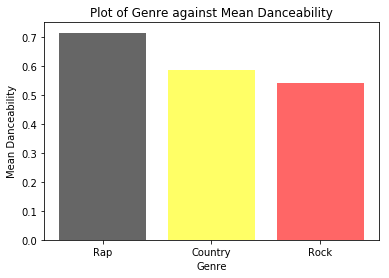

In [21]:
# Our fav colors- lol :D
colors = ['black', 'yellow', 'red']

# Create plots
plt.bar(x_axis, y_axis, align='center', color=colors, alpha=0.6)
# add genre categories to the x axis
plt.xticks(x_axis, u_genre[:])
# add labels to plot
plt.ylabel('Mean Danceability')
plt.xlabel('Genre')
plt.title('Plot of Genre against Mean Danceability')
# Show plot
plt.show()

In [ ]:
#fig = plt.figure(figsize=(12,8))
#plt.title("Genre Danceability")

#colors = {'Rap':'red', 'Country':'blue', 'Rock':'green'}
#dance.hist(rap_dance, country_dance, rock_dance, label=['Genre'], color=colors, alpha=0.5, bins=30)
# created a list with the straight brackets. Created a loop to everything in the list and to kick out the index



In [ ]:
y_group = music_df.groupby(['Genre'])
y_group.mean()